In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize,RegexpTokenizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
from sklearn.metrics import confusion_matrix

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [5]:
data = pd.read_csv('newsCorpora.csv',sep = '\t', 
                   names = ['ID', 'TITLE', 'URL', 'PUBLISHER', 'CATEGORY', 'STORY', 'HOSTNAME', 'TIMESTAMP'])

In [6]:
data.sample(5)

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
182600,182936,Kendall Jenner's Sleek Cat Eye Liner At The 20...,http://hollywoodlife.com/2014/05/05/kendall-je...,Hollywood Life,e,dbfJRt2YOiGnSoMC7S8yBd9gQohiM,hollywoodlife.com,1399382222758
181703,182039,AMD to combine 64-bit x86 and ARM chip archite...,http://www.theinquirer.net/inquirer/news/23431...,Inquirer,t,djYshNh5skKYi9MltCwElKVNQRB0M,www.theinquirer.net,1399378131602
172464,172800,Justin Bieber and Kendall Jenner might collabo...,http://entertainment.ofwnow.com/celebrity-news...,OFW News On Web,e,dFXtL6lz5yh_I9MX3a4zodKcvkSiM,entertainment.ofwnow.com,1398856027976
316323,316783,One Man Ballet Based on the Life of Michael Ja...,http://www.digitaljournal.com/pr/2013111,DigitalJournal.com,e,djRFAtFbYm9cAKMclCzhE-q9Zh7ZM,www.digitaljournal.com,1403715915522
404031,404550,Prayer vigil held for Charlotte woman fighting...,http://www.wsoctv.com/news/news/local/prayer-v...,WSOC Charlotte,m,d1WmICMngDmqaaM73nLBG_cAQFKIM,www.wsoctv.com,1406803461296


In [7]:
data = data.drop(columns = ['HOSTNAME','STORY','URL','TIMESTAMP'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422419 entries, 0 to 422418
Data columns (total 4 columns):
ID           422419 non-null int64
TITLE        422419 non-null object
PUBLISHER    422417 non-null object
CATEGORY     422419 non-null object
dtypes: int64(1), object(3)
memory usage: 12.9+ MB


There are no null values in the data

In [9]:
data = data.set_index(['ID'])

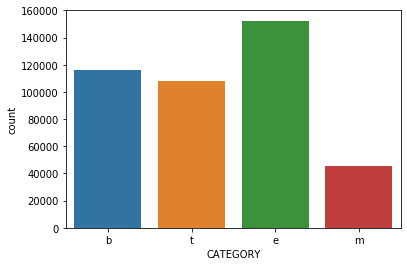

In [10]:
sns.countplot(data.CATEGORY);

most of the news belong to the entertainment(e) category 

In [11]:
data.sample(5)

,TITLE,PUBLISHER,CATEGORY
ID,,,
72410,'Harry Potter' Spinoff 'Fantastic Beasts' Will...,Headlines \& Global News,e
273889,4 New iOS 8 Features that Will Save You Money,Go Banking Rates,t
86067,Comedian John Pinette dead of pulmonary emboli...,Examiner.com,e
411015,"Hilary Duff talks ""really difficult"" split fro...",SheKnows.com,e
304408,Bjork's Biophilia to be adopted into European ...,Hollywood.com,e


In [12]:
tokenizer =  RegexpTokenizer(r'[A-Za-z]+')

In [13]:
tokenizer.tokenize(data.TITLE[358422])

['Fox', 'I', 'don', 't', 'have', 'Many', 'Friends']

In [14]:
data['wordtoken_TITLE'] = data.TITLE.map(lambda x : tokenizer.tokenize(x))

In [15]:
data.sample(5)

,TITLE,PUBLISHER,CATEGORY,wordtoken_TITLE
ID,,,,
308933,The strength of Microsoft's Surface Pro 3: It'...,ITProPortal,t,"[The, strength, of, Microsoft, s, Surface, Pro..."
292525,Mick Jagger Called 'Grotesquely Disrespectful'...,Music Times,e,"[Mick, Jagger, Called, Grotesquely, Disrespect..."
77622,"[Happy Birthday] Gmail Is 10 Years Old Today, ...",Android Police,t,"[Happy, Birthday, Gmail, Is, Years, Old, Today..."
384831,Koster: Missouri E-Book Consumers May See Slic...,OzarksFirst.com,t,"[Koster, Missouri, E, Book, Consumers, May, Se..."
291213,Steve Jobs Didn't Believe there was a Market f...,PadGadget,t,"[Steve, Jobs, Didn, t, Believe, there, was, a,..."


In [16]:
ps = PorterStemmer()

In [17]:
[ps.stem(word) for word in data.wordtoken_TITLE[363672]]


['jessica',
 'simpson',
 'and',
 'eric',
 'johnson',
 'exchang',
 'vow',
 'at',
 'san',
 'ysidro',
 'ranch',
 'in',
 'front']

In [18]:
data['text_stemmed'] = data['wordtoken_TITLE'].map(lambda l:[ps.stem(word) for word in l])

In [19]:
data.sample(5)

,TITLE,PUBLISHER,CATEGORY,wordtoken_TITLE,text_stemmed
ID,,,,,
357592,Music Publishing Roundup 7.4.14: Songza + Goog...,hypebot.com,t,"[Music, Publishing, Roundup, Songza, Google, N...","[music, publish, roundup, songza, googl, neils..."
40630,Lady Gaga bares all for new music video GUY,India Today,e,"[Lady, Gaga, bares, all, for, new, music, vide...","[ladi, gaga, bare, all, for, new, music, video..."
182800,Ben Affleck pinched for card counting in Vegas,Sports Memo \(blog\),e,"[Ben, Affleck, pinched, for, card, counting, i...","[ben, affleck, pinch, for, card, count, in, vega]"
315980,What Do You Think Of Facebook's Slingshot?,Gizmodo India,t,"[What, Do, You, Think, Of, Facebook, s, Slings...","[what, Do, you, think, Of, facebook, s, slings..."
421743,Actor Matt Damon uses toilet water to support ...,AL.com,e,"[Actor, Matt, Damon, uses, toilet, water, to, ...","[actor, matt, damon, use, toilet, water, to, s..."


In [20]:
(' ').join(data.text_stemmed[373180])

'justin bieber sung at hi manag s wed at the weekend'

In [21]:
data['TITLE_Sent'] = data['text_stemmed'].map(lambda l: (' ').join(l))

In [22]:
data.sample(5)

,TITLE,PUBLISHER,CATEGORY,wordtoken_TITLE,text_stemmed,TITLE_Sent
ID,,,,,,
20640,Long-delayed study of marijuana for traumatize...,The Tribune,m,"[Long, delayed, study, of, marijuana, for, tra...","[long, delay, studi, of, marijuana, for, traum...",long delay studi of marijuana for traumat vete...
133680,"Sony Unveils SHAREfactory, Confirms Digital Pr...",Side Mission,t,"[Sony, Unveils, SHAREfactory, Confirms, Digita...","[soni, unveil, sharefactori, confirm, digit, p...",soni unveil sharefactori confirm digit pre loa...
314072,"“American Idol”: JLo, Keith Urban, Harry Conni...",PopStop TV,e,"[American, Idol, JLo, Keith, Urban, Harry, Con...","[american, idol, jlo, keith, urban, harri, con...",american idol jlo keith urban harri connick Jr...
419398,Why is Avago Technologies an Ideal Investment ...,GuruFocus.com,t,"[Why, is, Avago, Technologies, an, Ideal, Inve...","[whi, is, avago, technolog, an, ideal, invest,...",whi is avago technolog an ideal invest candid
390257,"Jon Stewart Dresses As Princess Leia, Defeats ...",Huffington Post \(satire\),e,"[Jon, Stewart, Dresses, As, Princess, Leia, De...","[jon, stewart, dress, As, princess, leia, defe...",jon stewart dress As princess leia defeat step...


In [23]:
data = data[['PUBLISHER','TITLE_Sent','CATEGORY']]


combining PUBLISHER and TITLE_Sent columns

In [24]:
data['TITLE_PUBLISHER'] = data['PUBLISHER'] +' ' + data['TITLE_Sent']

In [25]:
data = data[['TITLE_PUBLISHER','CATEGORY']]

In [26]:
data.head()

,TITLE_PUBLISHER,CATEGORY
ID,,
1,Los Angeles Times fed offici say weak data cau...,b
2,Livemint fed s charl plosser see high bar for ...,b
3,IFA Magazine US open stock fall after fed offi...,b
4,IFA Magazine fed risk fall behind the curv cha...,b
5,Moneynews fed s plosser nasti weather ha curb ...,b


In [27]:
data.isna().sum()

TITLE_PUBLISHER    2
CATEGORY           0
dtype: int64

In [28]:
data = data.dropna()

In [29]:
cv = CountVectorizer(stop_words= 'english')

In [30]:
cv.fit(data['TITLE_PUBLISHER'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [31]:
out = cv.transform(data['TITLE_PUBLISHER'])

In [32]:
out.shape

(422417, 39598)

In [33]:
len(cv.vocabulary_)

39598

In [34]:
trainX,testX,trainY,testY = train_test_split(out,data['CATEGORY'])

In [36]:
algos = { 'MultinomialNB' : MultinomialNB(),
        'LogisticRegression':LogisticRegression(),
        'RandomForestClassifier':RandomForestClassifier(n_estimators=100)
        }

In [37]:
for name, algo in algos.items():
    estimator = algo
    estimator.fit(trainX,trainY)
    print('Training Accuracy of ',name, estimator.score(trainX,trainY))
    print('Testing Accuracy of ',name, estimator.score(testX,testY))
    y_pred = estimator.predict(testX)
    con_mat = confusion_matrix(y_pred= y_pred, y_true = testY)
    print(con_mat)
    print('*'*40)
    
    

Training Accuracy of  MultinomialNB 0.9265368736032726
Testing Accuracy of  MultinomialNB 0.9199090952132948
[[26155   479   543  1838]
 [  608 36272   382   749]
 [  465   330 10361   172]
 [ 1996   524   372 24359]]
****************************************


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training Accuracy of  LogisticRegression 0.9592660631541734
Testing Accuracy of  LogisticRegression 0.9442829411486199
[[26854   433   247  1481]
 [  401 37152   129   329]
 [  434   262 10477   155]
 [ 1461   439   113 25238]]
****************************************
Training Accuracy of  RandomForestClassifier 0.9988005504841988
Testing Accuracy of  RandomForestClassifier 0.929207897353345
[[26730   825   231  1229]
 [  673 36876   146   316]
 [  675   583  9864   206]
 [ 1557   873   162 24659]]
****************************************


* Logistic Regression has better acuuracy